In [2]:
# 🌦️ Weather Data Analysis  
# **Dataset:** `weatherHistory.csv`  
# **Objective:** Clean the dataset, analyze weather patterns, detect anomalies, and visualize trends.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

In [ ]:
## 📥 Load Dataset & Basic Info

In [5]:
weather_df = pd.read_csv('C:/Users/ASWIN/Documents/python/projects/weatherHistory.csv')
print(weather_df.shape)
weather_df.info()

(96453, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
## 🔍 Missing Value Detection & Cleaning

In [24]:
def missing_values(df):
    missing_col = []
    for values in df.columns:
        missing = df[values].isna().sum()
        if missing != 0:
            missing_col.append(values)
            print(f"{values} has {missing} missing values")
    return missing_col

missing_values(weather_df)

# Fill missing precip type
weather_df['Precip Type'] = weather_df['Precip Type'].fillna('none')

In [8]:
## 🌡️ Fix Incorrect Temperature & Wind Speed Values

In [12]:
def clean_incorrect_temperature(df, column='Temperature (C)', min_val=-50, max_val=60):
    mean_temp = df[column].mean()
    unrealistic_temp_count = df[(df[column] < min_val) | (df[column] > max_val)].shape[0]
    df.loc[(df[column] < min_val) | (df[column] > max_val), column] = mean_temp
    print(f"{unrealistic_temp_count} unrealistic temperatures replaced with mean value ({mean_temp:.2f})")
    return df

def clean_incorrect_windspeed(df, column='Wind Speed (km/h)', min_val=0, max_val=200):
    mean_windspeed = df[column].mean()
    n_unrealistic_wind = df[(df[column] < min_val) | (df[column] > max_val)].shape[0]
    df.loc[(df[column] < min_val) | (df[column] > max_val), column] = mean_windspeed
    print(f"{n_unrealistic_wind} unrealistic wind speed replaced with mean value ({mean_windspeed:.2f})")
    return df

clean_incorrect_temperature(weather_df)
clean_incorrect_windspeed(weather_df)

0 unrealistic temperatures replaced with mean value (11.93)
0 unrealistic wind speed replaced with mean value (10.81)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
## 📊 Temperature Trends (Month & Year)

In [13]:
def find_avg_temp_month(df):
    df = df.copy()
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
    df['month'] = df['Formatted Date'].dt.month
    return df.groupby('month')['Temperature (C)'].mean()

def find_avg_temp_year(df):
    df = df.copy()
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
    df['year'] = df['Formatted Date'].dt.year
    return df.groupby('year')['Temperature (C)'].mean()

find_avg_temp_month(weather_df), find_avg_temp_year(weather_df)

(month
 1      0.815678
 2      2.166880
 3      6.914976
 4     12.769200
 5     16.874455
 6     20.728510
 7     22.965462
 8     22.339134
 9     17.503458
 10    11.334119
 11     6.587549
 12     1.625086
 Name: Temperature (C), dtype: float64,
 year
 2005     0.577778
 2006    11.215225
 2007    12.134677
 2008    12.161819
 2009    12.269682
 2010    11.200176
 2011    11.524934
 2012    11.986824
 2013    11.941017
 2014    12.528228
 2015    12.312088
 2016    11.987381
 Name: Temperature (C), dtype: float64)

In [ ]:
## 🔗 Correlation Analysis (Humidity vs Temperature)

In [14]:
correlation = weather_df['Temperature (C)'].corr(weather_df['Humidity'])
print("Correlation between temperature and humidity:", correlation)

Correlation between temperature and humidity: -0.6322546750278076


In [ ]:
## ⚠️ Detect Extreme Weather Conditions

In [15]:
class ExtremeWeather:
    def __init__(self, df):
        self.df = df

    def extreme_temperature(self, col='Temperature (C)'):
        ext_temp = self.df[(self.df[col] < -20) | (self.df[col] > 40)]
        return f'Extreme temperature days: {len(ext_temp)}'

    def extreme_windspeed(self, col='Wind Speed (km/h)'):
        ext_wind = self.df[self.df[col] > 100]
        return f'Extreme wind speed days: {len(ext_wind)}'

    def extreme_humidity(self, col='Humidity'):
        ext_hum = self.df[(self.df[col] < 10) | (self.df[col] > 95)]
        return f'Extreme humidity days: {len(ext_hum)}'

ext = ExtremeWeather(weather_df)
print(ext.extreme_temperature())
print(ext.extreme_windspeed())
print(ext.extreme_humidity())

Extreme temperature days: 9
Extreme wind speed days: 0
Extreme humidity days: 96453


In [ ]:
# 📉 Visualizations  

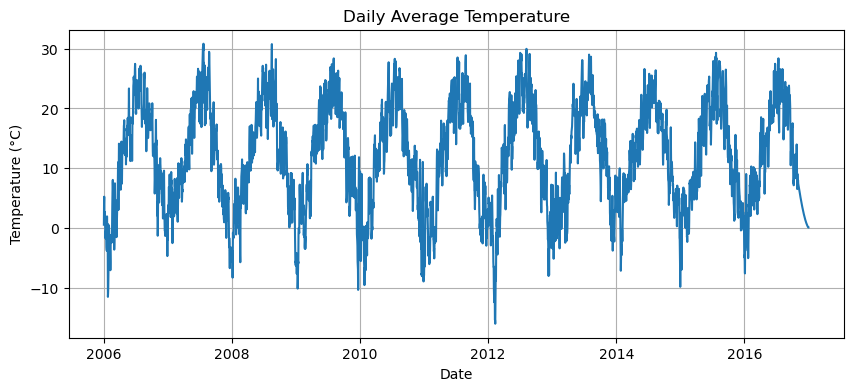

In [17]:
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc=True)
daily_temp = weather_df.resample('D', on='Formatted Date')['Temperature (C)'].mean()

plt.figure(figsize=(10,4))
plt.plot(daily_temp.index, daily_temp.values)
plt.title("Daily Average Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

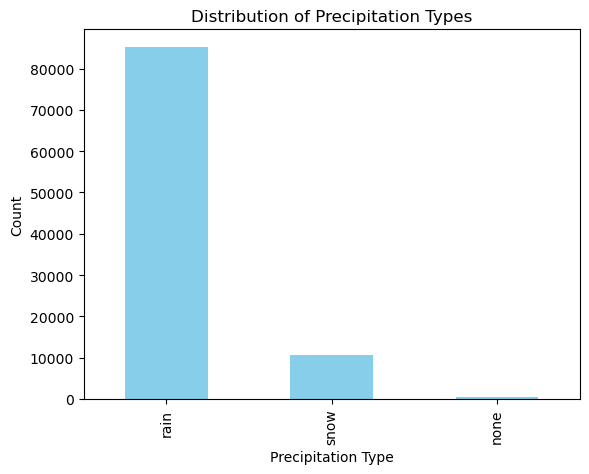

In [18]:
weather_df['Precip Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Precipitation Types")
plt.xlabel("Precipitation Type")
plt.ylabel("Count")
plt.show()


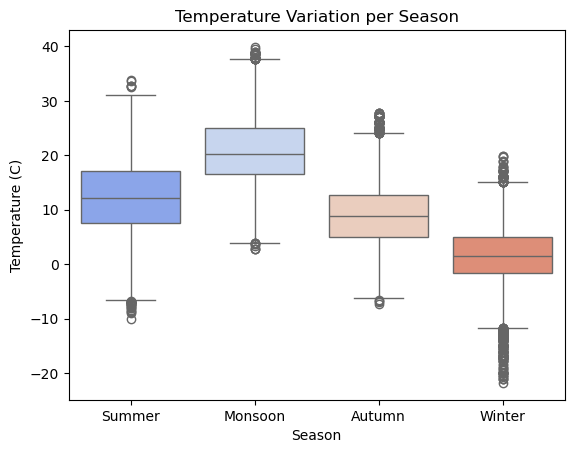

In [22]:
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    if month in [3,4,5]: return 'Summer'
    if month in [6,7,8,9]: return 'Monsoon'
    return 'Autumn'

weather_df['Season'] = weather_df['Formatted Date'].dt.month.map(get_season)

sns.boxplot(x='Season',y='Temperature (C)',hue='Season',data=weather_df,palette='coolwarm',legend=False)
plt.title("Temperature Variation per Season")
plt.show()


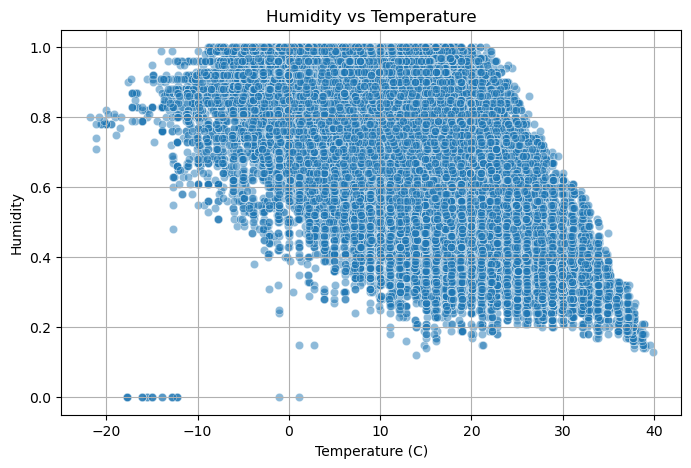

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature (C)', y='Humidity', data=weather_df, alpha=0.5)
plt.title("Humidity vs Temperature")
plt.grid(True)
plt.show()